# [Модуль "Pythob для аналитиков данных"](https://ru.hexlet.io/programs/python-for-data-analysts)

## [Проект: Дашборд конверсий](https://ru.hexlet.io/programs/python-for-data-analysts/projects/100)


In [338]:
from dotenv import load_dotenv
import pandas as pd
import os
import re
import requests

import matplotlib.pyplot as plt

#### Данные (образец):

[Визиты](https://drive.google.com/file/d/1QosQQ4RRNR9rkL4t7sB707h2Uy0XfYJe/view?usp=drive_link) - тысяча записей с визитами

[Регистрации](https://drive.google.com/file/d/1AeQz0kaSgz0lxYSDtuNm36muhy5fRCzZ/view?usp=drive_link) - тысяча записей о первых регистрациях


## Скачивание данных

In [26]:
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')

In [17]:
def download_from_api(url, endpoint, path_to_save, start_date=None, end_date=None):
    download_link = f'{url}/{endpoint}'
    if start_date or end_date:
        download_link += "?"
        if start_date:
            download_link += f'begin={start_date}'
        if end_date:
            download_link += f'&end={end_date}' if start_date else f'end={end_date}'
            
    print(f'Download from the link {download_link}...')
    response = requests.get(download_link)
    if response.ok:
        with open(path_to_save, 'wb') as file:
            file.write(response.content)
        print(f"File successfully saved as '{path_to_save}'")
    else:
        print(f"Error downloading file: status code {response.status_code}")

In [28]:
visits_path = './data/visits.json'
registrations_path = './data/registrations.json'

#### Скачивание данных **visits**

In [28]:
download_from_api(url=API_URL,
         endpoint='visits',
         path_to_save=visits_path,
         start_date=DATE_BEGIN,
         end_date=DATE_END)

Download from the link https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01...
File successfully saved as './data/visits.json'


#### Скачивание данных **registrations**

In [31]:
download_from_api(url=API_URL,
         endpoint='registrations',
         path_to_save=registrations_path,
         start_date=DATE_BEGIN,
         end_date=DATE_END)

Download from the link https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01...
File successfully saved as './data/registrations.json'


## Изучение датафреймов

### visits

In [32]:
visits = pd.read_json(visits_path)
visits.head(3)

,visit_id,platform,user_agent,datetime
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01 06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01 10:26:13


In [33]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263459 entries, 0 to 263458
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visit_id    263459 non-null  object        
 1   platform    263459 non-null  object        
 2   user_agent  263459 non-null  object        
 3   datetime    263459 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 8.0+ MB


In [34]:
visits.describe()

,datetime
count,263459
mean,2023-06-01 06:22:22.042044672
min,2023-03-01 00:00:43
25%,2023-04-13 19:45:03
50%,2023-06-03 12:23:27
75%,2023-07-17 22:09:08
max,2023-08-31 23:52:57


In [35]:
visits.head(3)

,visit_id,platform,user_agent,datetime
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01 06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01 10:26:13


### registrations

In [37]:
registrations = pd.read_json(registrations_path)
registrations.head(3)

,datetime,user_id,email,platform,registration_type
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple


In [38]:
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21836 entries, 0 to 21835
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           21836 non-null  datetime64[ns]
 1   user_id            21836 non-null  object        
 2   email              21836 non-null  object        
 3   platform           21836 non-null  object        
 4   registration_type  21836 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 853.1+ KB


In [39]:
registrations.describe()

,datetime
count,21836
mean,2023-05-29 10:17:02.002747904
min,2023-03-01 00:04:47
25%,2023-04-12 01:49:47.500000
50%,2023-05-26 13:22:09
75%,2023-07-15 17:26:30.500000
max,2023-08-31 23:43:26


In [40]:
registrations.head(3)

,datetime,user_id,email,platform,registration_type
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple


## Расчет метрик

* Сгруппировать данные визитов по датам и платформам
* Сгруппировать также данные регистраций по датам и платформам
* Объединить датайфреймы, сделать итоговый датафрейм с расчетом конверсии
* Сохранить датафрейм в формате JSON *conversion.json*
* Поля датафрейма:
  - date_group - сагрегированный столбец дат
  - platform - платформа (android,web,ios)
  - visits - визиты за период date_group
  - registrations - регистрации за период date_group
  - conversion - конверсия по платформе

In [114]:
path_to_save_conversions = './conversion.json'

#### Группировка данных визитов по датам и платформам

#### Подготовка данных:
* преобразование datetime -> date
* удаление дубликатов записей с одинаковым id
* удаление записей визитов ботов

In [45]:
def prepare_visits_data(visits):
    # Визиты ботов не должны влиять на расчет конверсии
    prepared_visits = visits[~visits.user_agent.str.contains('bot')].copy()
    
    # Преобразование datetime -> date
    prepared_visits['date'] = pd.to_datetime(prepared_visits.pop('datetime')).dt.date

    # Пользователи могли заходить на сайт несколько раз, прежде чем зарегистрироваться.
    # Оставить последний визит для каждого visit_id
    prepared_visits.sort_values(by=['visit_id', 'date'], ascending=[True, False], inplace=True)
    prepared_visits = prepared_visits.drop_duplicates(subset='visit_id', keep='first')
    
    prepared_visits.sort_values(by='date', inplace=True)
    return prepared_visits

In [46]:
def prepare_registrations_data(registrations):
    # Преобразование datetime -> date
    prepared_registrations = registrations.copy()
    prepared_registrations['date'] = pd.to_datetime(registrations.datetime).dt.date
    prepared_registrations.sort_values(by='date', inplace=True)
    return prepared_registrations

In [47]:
prepared_visits = prepare_visits_data(visits)
prepared_visits.head(3)

,visit_id,platform,user_agent,date
89,58b3098c-99b9-4557-a7bc-ee9f5e993811,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01
159,d698a72c-5ce4-438d-8afd-1877527e1ca8,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01
58,3480251a-dbd2-4b62-ae57-a9865c7b2cec,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01


In [59]:
prepared_registrations = prepare_registrations_data(registrations)
prepared_registrations.head(3)

,datetime,user_id,email,platform,registration_type,date
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google,2023-03-01
63,2023-03-01 04:19:11,d241b05f-38b4-4eb7-9c1a-9e1caa00d83e,ingramgina@example.net,android,google,2023-03-01
62,2023-03-01 10:07:32,b612aff6-96dc-4a1b-b82a-000accb14d02,katelyn71@example.org,android,google,2023-03-01


#### Группировка данных визитов по датам и платформам

In [61]:
grouped_visits = prepared_visits.groupby(['date','platform']).agg(visits=('visit_id', 'size')).reset_index()
grouped_visits.rename(columns={'date': 'date_group'}, inplace=True)
grouped_visits

,date_group,platform,visits
0,2023-03-01,android,75
1,2023-03-01,ios,22
2,2023-03-01,web,279
3,2023-03-02,android,67
4,2023-03-02,ios,31
...,...,...,...
547,2023-08-30,ios,66
548,2023-08-30,web,1227
549,2023-08-31,android,57
550,2023-08-31,ios,50


#### Группировка данных регистраций по датам и платформам

In [63]:
grouped_registrations = prepared_registrations.groupby(['date','platform']).agg(registrations=('user_id', 'size')).reset_index()
grouped_registrations.rename(columns={'date': 'date_group'}, inplace=True)
grouped_registrations

,date_group,platform,registrations
0,2023-03-01,android,61
1,2023-03-01,ios,18
2,2023-03-01,web,8
3,2023-03-02,android,59
4,2023-03-02,ios,24
...,...,...,...
547,2023-08-30,ios,40
548,2023-08-30,web,34
549,2023-08-31,android,42
550,2023-08-31,ios,36


#### Объединение датафреймов и рассчет конверсии

In [65]:
conversion_df = pd.merge(grouped_visits, grouped_registrations, on=['date_group', 'platform'])
conversion_df['conversion'] = conversion_df['registrations'] / conversion_df['visits']
conversion_df.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,0.813333
1,2023-03-01,ios,22,18,0.818182
2,2023-03-01,web,279,8,0.028674
3,2023-03-02,android,67,59,0.880597
4,2023-03-02,ios,31,24,0.774194


In [116]:
conversion_df.to_json(path_to_save_conversions)

## Добавление данных о рекламе

### Добавить данные по рекламным кампаниям. На выходе получить датафрейм со следующими полями:
* date_group — дата
* visits — визиты в дату
* registrations — регистрации в дату
* cost — затраты на рекламу, 0 если не было затрат
* utm_campaign — название рекламной кампании, none если не было в этот период рекламы

**Сагрегировать данные по дате и сохраним их в JSON:**

- Объединить датайфрейм конверсий с рекламными кампаниями
- Сохранить датафрейм в формате JSON с именем *ads.json*


In [120]:
path_to_save_processed_ads = './ads.json'

In [69]:
ads_view_url = 'https://drive.google.com/file/d/12vCtGhJlcK_CBcs8ES3BfEPbk6OJ45Qj/view'

In [70]:
def download_google_data(google_view_url, path_to_save):
    '''
    Downloading a file from Google Drive using a public link.
    
    Args:
        google_view_url (str): Link to Google Drive (in the format “file/d//.../view”).
        path_to_save (str): Path to save the file to disk.
    
    Returns:
        str: Path to the saved file on successful upload, otherwise None.
    '''
    resource_id_search_result = re.search(r'file/d/([^/]+)/view', google_view_url)
    if not resource_id_search_result:
        print(f"Nothing found at URL: {ads_view_url}")
        return
    
    resource_id = resource_id_search_result.group(1)
    download_url = f"https://drive.google.com/uc?id={resource_id}"
    
    response = requests.get(download_url)
    if not response.ok:
        print(f'File download error: {response.status_code}')
        return
    try:
        with open(path_to_save, 'wb') as f:
            f.write(response.content)
        print(f"File successfully saved as '{path_to_save}'")
    except Exception as e:
        print(f'Error saving file: {e}')
        return
    return path_to_save


In [73]:
ads_path = download_google_data(ads_view_url, './ads.csv')

File successfully saved as './ads.csv'


#### Чтение и изучение **ads**

In [75]:
ads_df = pd.read_csv(ads_path)
ads_df.head()

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T10:54:41,google,cpc,advanced_algorithms_series,212
1,2023-03-02T10:32:35,google,cpc,advanced_algorithms_series,252
2,2023-03-03T19:21:40,google,cpc,advanced_algorithms_series,202
3,2023-03-04T17:52:04,google,cpc,advanced_algorithms_series,223
4,2023-03-05T05:35:13,google,cpc,advanced_algorithms_series,265


In [77]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          159 non-null    object
 1   utm_source    159 non-null    object
 2   utm_medium    159 non-null    object
 3   utm_campaign  159 non-null    object
 4   cost          159 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ KB


#### Предварительная подготовка **ads**

In [158]:
def prepare_ads(ads):
    prepared_ads = ads.copy()
    prepared_ads['date'] = pd.to_datetime(ads.date).dt.date
    prepared_ads.sort_values(by='date', inplace=True)
    return prepared_ads

In [160]:
prepared_ads_df = prepare_ads(ads_df)
prepared_ads_df

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,advanced_algorithms_series,212
1,2023-03-02,google,cpc,advanced_algorithms_series,252
2,2023-03-03,google,cpc,advanced_algorithms_series,202
3,2023-03-04,google,cpc,advanced_algorithms_series,223
4,2023-03-05,google,cpc,advanced_algorithms_series,265
...,...,...,...,...,...
154,2023-09-13,vk,social,intro_to_python_course,277
155,2023-09-14,vk,social,intro_to_python_course,221
156,2023-09-15,vk,social,intro_to_python_course,175
157,2023-09-16,vk,social,intro_to_python_course,224


In [214]:
def merge_and_process(conversion_df, ads_df):
    result = conversion_df.merge(
        ads_df, left_on='date_group', right_on='date', how='left')
    result.drop(
        ['date', 'platform', 'conversion', 'utm_source', 'utm_medium'], axis=1, inplace=True)
    result['cost'] = result['cost'].fillna(0)
    result['utm_campaign'] = result['utm_campaign'].fillna('none')
    result = (
        result.groupby(['date_group', 'utm_campaign'], as_index=False)
            .agg({
                'visits': 'sum',
                'registrations': 'sum',
                'cost': 'first'
            })
    )
    result = result[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]
    return result

In [218]:
campaign_summary_df = merge_and_process(conversion_df, prepared_ads_df)
campaign_summary_df

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,376,87,212.0,advanced_algorithms_series
1,2023-03-02,613,106,252.0,advanced_algorithms_series
2,2023-03-03,683,107,202.0,advanced_algorithms_series
3,2023-03-04,647,159,223.0,advanced_algorithms_series
4,2023-03-05,707,115,265.0,advanced_algorithms_series
...,...,...,...,...,...
179,2023-08-27,795,88,222.0,intro_to_python_course
180,2023-08-28,635,83,223.0,intro_to_python_course
181,2023-08-29,1268,143,190.0,intro_to_python_course
182,2023-08-30,1328,101,109.0,intro_to_python_course


In [224]:
campaign_summary_df.to_json(path_th_save_processed_ads)

## Визуализация

In [328]:
dir_to_save_plots = './charts'

In [232]:
conversion_df

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,0.813333
1,2023-03-01,ios,22,18,0.818182
2,2023-03-01,web,279,8,0.028674
3,2023-03-02,android,67,59,0.880597
4,2023-03-02,ios,31,24,0.774194
...,...,...,...,...,...
547,2023-08-30,ios,66,40,0.606061
548,2023-08-30,web,1227,34,0.027710
549,2023-08-31,android,57,42,0.736842
550,2023-08-31,ios,50,36,0.720000


##### Итоговые визиты

In [334]:
def plot_total_visits(df, save_path=None):
    plt.figure(figsize=(12, 6))
    
    plt.bar(df.date_group, df.visits, label='Total Visits', color='skyblue', edgecolor='black')
    
    plt.title('Total Visits', fontsize=16)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Visits', fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.legend()
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
    plt.show()


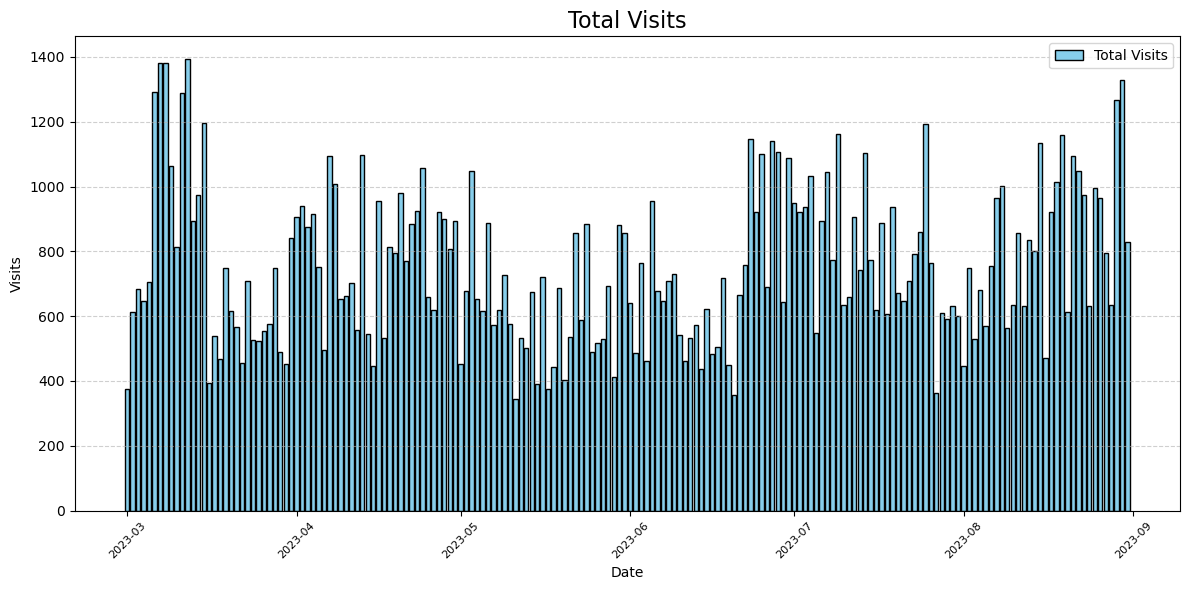

In [340]:
plot_total_visits(campaign_summary_df, f'{dir_to_save_plots}/total_visits.png')